In [1]:
from shapely.geometry import Point, MultiPoint, LinearRing, Polygon,\
    MultiPolygon, LineString, MultiLineString

from arcgis_lite import to_arcgis_geometry

In [2]:
def tuples_to_lists(tuples):
    return list(map(tuples_to_lists, tuples)) if isinstance(tuples, (list, tuple)) else tuples

## Points

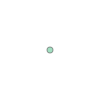

In [3]:
point = Point(0.0, 0.0)
point

In [4]:
to_arcgis_geometry(point, 3857)

{'x': 0.0, 'y': 0.0, 'spatialReference': {'wkid': 3857}}

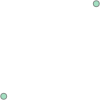

In [5]:
points = MultiPoint([(0.0, 0.0), (1.0, 1.0)])
points

In [6]:
points.__geo_interface__['coordinates']

((0.0, 0.0), (1.0, 1.0))

In [7]:
tuples_to_lists(points.__geo_interface__['coordinates'])

[[0.0, 0.0], [1.0, 1.0]]

In [8]:
to_arcgis_geometry(points, 3857)

{'points': [[0.0, 0.0], [1.0, 1.0]], 'spatialReference': {'wkid': 3857}}

## Lines

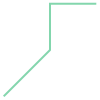

In [9]:
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
a

In [10]:
a.__geo_interface__['coordinates']

((0.0, 0.0), (1.0, 1.0), (1.0, 2.0), (2.0, 2.0))

In [13]:
tuples_to_lists(a.__geo_interface__['coordinates'])

[[0.0, 0.0], [1.0, 1.0], [1.0, 2.0], [2.0, 2.0]]

In [14]:
to_arcgis_geometry(a, 3857)

{'paths': [[[0.0, 0.0], [1.0, 1.0], [1.0, 2.0], [2.0, 2.0]]],
 'spatialReference': {'wkid': 3857}}

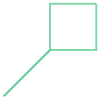

In [15]:
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])
c = MultiLineString([a,b])
c

In [16]:
c.__geo_interface__['coordinates']

(((0.0, 0.0), (1.0, 1.0), (1.0, 2.0), (2.0, 2.0)),
 ((0.0, 0.0), (1.0, 1.0), (2.0, 1.0), (2.0, 2.0)))

In [17]:
tuples_to_lists(c.__geo_interface__['coordinates'])

[[[0.0, 0.0], [1.0, 1.0], [1.0, 2.0], [2.0, 2.0]],
 [[0.0, 0.0], [1.0, 1.0], [2.0, 1.0], [2.0, 2.0]]]

In [18]:
to_arcgis_geometry(c, 3857)

{'paths': [[[0.0, 0.0], [1.0, 1.0], [1.0, 2.0], [2.0, 2.0]],
  [[0.0, 0.0], [1.0, 1.0], [2.0, 1.0], [2.0, 2.0]]],
 'spatialReference': {'wkid': 3857}}

## Polygons

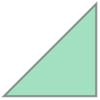

In [19]:
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon

In [20]:
polygon.__geo_interface__['coordinates']

(((0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)),)

In [21]:
tuples_to_lists(polygon.__geo_interface__['coordinates'])

[[[0.0, 0.0], [1.0, 1.0], [1.0, 0.0], [0.0, 0.0]]]

In [22]:
to_arcgis_geometry(polygon, 3857)

{'rings': [[[0.0, 0.0], [1.0, 1.0], [1.0, 0.0], [0.0, 0.0]]],
 'spatialReference': {'wkid': 3857}}

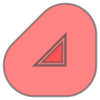

In [48]:
coords = [(0, 0), (1, 1), (1, 0)]
r = LinearRing(coords)
s = Polygon(r)
t = Polygon(s.buffer(1.0).exterior, [r])
polygons = MultiPolygon([polygon, s.buffer(-0.1), t])
polygons

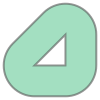

In [53]:
t

In [54]:
to_arcgis_geometry(t, 3857)

{'rings': [[[0.0, -1.0],
   [-0.09801714032956664, -0.9951847266721963],
   [-0.19509032201613388, -0.9807852804032293],
   [-0.2902846772544675, -0.9569403357322073],
   [-0.38268343236509444, -0.9238795325112849],
   [-0.4713967368260018, -0.8819212643483528],
   [-0.5555702330196066, -0.8314696123025422],
   [-0.6343932841636494, -0.7730104533627338],
   [-0.7071067811865505, -0.7071067811865446],
   [-0.7730104533627397, -0.6343932841636423],
   [-0.8314696123025475, -0.555570233019599],
   [-0.8819212643483567, -0.4713967368259945],
   [-0.923879532511288, -0.3826834323650868],
   [-0.9569403357322097, -0.2902846772544596],
   [-0.980785280403231, -0.19509032201612575],
   [-0.9951847266721972, -0.09801714032955837],
   [-1.0, 1.8988215193149856e-15],
   [-0.9951847266721967, 0.09801714032956216],
   [-0.9807852804032301, 0.19509032201612989],
   [-0.9569403357322085, 0.2902846772544636],
   [-0.9238795325112864, 0.38268343236509067],
   [-0.8819212643483547, 0.4713967368259982],
